In [0]:
!git clone https://github.com/Picovoice/wake-word-benchmark.git

fatal: destination path 'wake-word-benchmark' already exists and is not an empty directory.


In [0]:
import os
os.listdir(os.getcwd())

['.config', 'wake-word-benchmark', 'sample_data']

In [0]:
path = os.getcwd()

folders = os.listdir(path+'/wake-word-benchmark/audio')

path2 = path+'/wake-word-benchmark/audio'

In [0]:

for i in folders:
  print(i)
  c=0
  print(len(os.listdir(path2+"/"+i)))



smart mirror
369
snowboy
401
view glass
399
alexa
329
jarvis
384
computer
411


In [0]:
alexa = path2+'/'+'alexa'
jarvis = path2+'/'+'jarvis'
smart = path2+'/'+'smart mirror'

comp = path2+'/'+'computer'
view = path2+'/'+'view glass'
snow = path2+'/'+'snowboy'

In [0]:
import librosa


In [0]:
for i in os.listdir(alexa):
  audio_path = alexa+"/"+i
  x , sr = librosa.load(audio_path)
  print(type(x), type(sr))

In [0]:
x

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

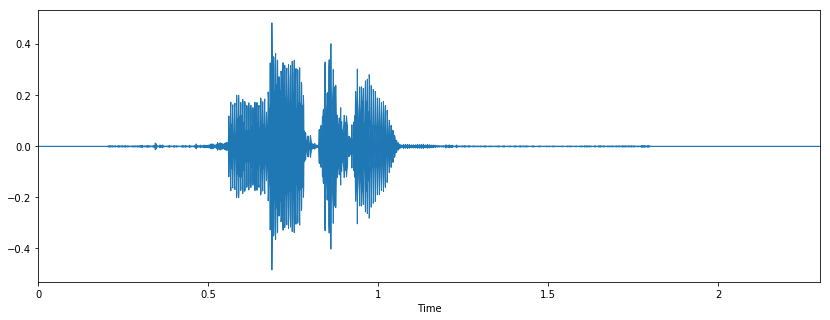

In [0]:


audio_path = alexa+"/"+os.listdir(alexa)[2]
x , sr = librosa.load(audio_path)
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

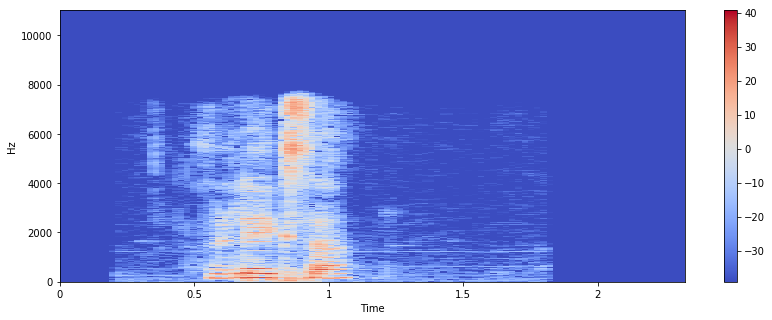

In [0]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

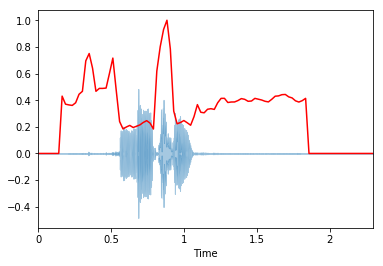

In [0]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

In [0]:
Xdb

array([[-39.206482, -39.206482, -39.206482, ..., -39.206482, -39.206482,
        -39.206482],
       [-39.206482, -39.206482, -39.206482, ..., -39.206482, -39.206482,
        -39.206482],
       [-39.206482, -39.206482, -39.206482, ..., -39.206482, -39.206482,
        -39.206482],
       ...,
       [-39.206482, -39.206482, -39.206482, ..., -39.206482, -39.206482,
        -39.206482],
       [-39.206482, -39.206482, -39.206482, ..., -39.206482, -39.206482,
        -39.206482],
       [-39.206482, -39.206482, -39.206482, ..., -39.206482, -39.206482,
        -39.206482]], dtype=float32)

In [0]:
from scipy import signal
import numpy as np
f, t, Zxx = signal.stft(x)

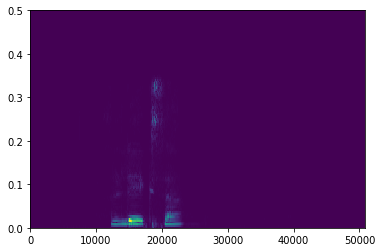

In [0]:
plt.pcolormesh(t, f, np.abs(Zxx))

In [0]:
fl = Zxx.flatten()
fl

array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
      dtype=complex64)

In [0]:
l=list()
for i in os.listdir(alexa):
  audio_path = alexa+"/"+i
  x , sr = librosa.load(audio_path)
  f, t, Zxx = signal.stft(x)
  l.append(Zxx.flatten())
  

In [0]:
type(l)

In [0]:

for i in l:
  print(len(i))

In [0]:
l2=list()
for i in os.listdir(jarvis):
  audio_path = jarvis+"/"+i
  x , sr = librosa.load(audio_path)
  f, t, Zxx = signal.stft(x)
  l2.append(Zxx.flatten())
  

In [0]:
len(l2)

In [0]:
for i in l2:
  print(len(i))

In [0]:
l3=list()
for i in os.listdir(comp):
  audio_path = comp+"/"+i
  x , sr = librosa.load(audio_path)
  f, t, Zxx = signal.stft(x)
  l3.append(Zxx.flatten())
  

In [0]:
for i in l3:
  print(len(i))

In [0]:
l4=list()
for i in os.listdir(smart):
  audio_path = smart+"/"+i
  x , sr = librosa.load(audio_path)
  f, t, Zxx = signal.stft(x)
  l4.append(Zxx.flatten())
  

In [0]:
l5=list()
for i in os.listdir(view):
  audio_path = view+"/"+i
  x , sr = librosa.load(audio_path)
  f, t, Zxx = signal.stft(x)
  l5.append(Zxx.flatten())

In [0]:
l6=list()
for i in os.listdir(snow):
  audio_path = snow+"/"+i
  x , sr = librosa.load(audio_path)
  f, t, Zxx = signal.stft(x)
  l6.append(Zxx.flatten())

In [0]:
tar = list()
for i in l:
  tar.append([0,0,0,0,0,1])
len(tar)

329

In [0]:
for i in l2:
  tar.append([0,0,0,0,1,0])

In [0]:
for i in l3:
  tar.append([0,0,0,1,0,0])

In [0]:
for i in l4:
  tar.append([0,0,1,0,0,0])

In [0]:
for i in l5:
  tar.append([0,1,0,0,0,0])

In [0]:
for i in l6:
  tar.append([1,0,0,0,0,0])

In [0]:
len(tar)

2293

In [0]:
final = l+l2+l3+l4+l5+l6


In [0]:
len(final)

2293

In [0]:
size =list()
for i in final:
  size.append(len(i))

In [0]:
min(size)

29025

In [0]:
np.argmin(size)

74

In [0]:
len(final[74])

29025

In [0]:
l

In [0]:
new_fin=list()
for i in final:
    dif = len(i)-29025
    n= dif/2
    new_fin.append(i[int(n):int(len(i)-n)])
  

In [0]:
for i in new_fin:
  print(len(i))

In [0]:
new_fin = np.asarray(new_fin)

In [0]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
import timeit

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
new_fin.shape

(2293, 29025)

In [0]:
target = np.asarray(tar)
target

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [0]:
batch_size = 128
num_classes = 6
epochs = 2



# the data, shuffled and split between train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_fin, target, test_size=0.25, random_state=42)



In [0]:
x_train.shape

(1719, 29025)

In [0]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal', input_dim=29025))
#Second  Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal'))

classifier.add(Dense(32, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(6, activation='sigmoid', kernel_initializer='random_normal'))

In [0]:
from keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.8)

In [0]:
classifier.compile(optimizer ='rmsprop',loss=keras.losses.categorical_crossentropy, metrics =['accuracy'])

In [0]:
classifier.fit(x_train,y_train, batch_size=100, epochs=50)

Epoch 1/50
1719/1719 [==============================] - 2s 1ms/step - loss: 1.7916 - acc: 0.1687
Epoch 2/50
1719/1719 [==============================] - 1s 560us/step - loss: 1.7910 - acc: 0.1850
Epoch 3/50
1719/1719 [==============================] - 1s 559us/step - loss: 1.7898 - acc: 0.1896
Epoch 4/50
1719/1719 [==============================] - 1s 556us/step - loss: 1.7862 - acc: 0.1856
Epoch 5/50
1719/1719 [==============================] - 1s 554us/step - loss: 1.7765 - acc: 0.1978
Epoch 6/50
1719/1719 [==============================] - 1s 559us/step - loss: 1.7575 - acc: 0.2164
Epoch 7/50
1719/1719 [==============================] - 1s 548us/step - loss: 1.7237 - acc: 0.2478
Epoch 8/50
1719/1719 [==============================] - 1s 558us/step - loss: 1.6668 - acc: 0.2641
Epoch 9/50
1719/1719 [==============================] - 1s 558us/step - loss: 1.5950 - acc: 0.2914
Epoch 10/50
1719/1719 [==============================] - 1s 556us/step - loss: 1.5136 - acc: 0.3188
Epoch 11/50

In [0]:
classifier.fit(x_train,y_train, batch_size=100, epochs=10)

Epoch 1/10
1719/1719 [==============================] - 1s 550us/step - loss: 0.4893 - acc: 0.6725
Epoch 2/10
1719/1719 [==============================] - 1s 567us/step - loss: 0.4701 - acc: 0.6748
Epoch 3/10
1719/1719 [==============================] - 1s 559us/step - loss: 0.4612 - acc: 0.6783
Epoch 4/10
1719/1719 [==============================] - 1s 552us/step - loss: 0.4499 - acc: 0.6806
Epoch 5/10
1719/1719 [==============================] - 1s 557us/step - loss: 0.4384 - acc: 0.6882
Epoch 6/10
1719/1719 [==============================] - 1s 546us/step - loss: 0.4346 - acc: 0.6847
Epoch 7/10
1719/1719 [==============================] - 1s 557us/step - loss: 0.4274 - acc: 0.6841
Epoch 8/10
1719/1719 [==============================] - 1s 560us/step - loss: 0.4150 - acc: 0.6992
Epoch 9/10
1719/1719 [==============================] - 1s 548us/step - loss: 0.4077 - acc: 0.6958
Epoch 10/10
1719/1719 [==============================] - 1s 549us/step - loss: 0.4137 - acc: 0.7004


In [0]:
eval_model=classifier.evaluate(x_train, y_train)
eval_model

1719/1719 [==============================] - 1s 472us/step


[0.4705476196717911, 0.6730657360663311]